<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/ML_node/ML_with_Python_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**이미지 분류**
* TensorFlow
* 이미지 분류하기
* CNN, 합성곱 신경망

**DL**
* 뉴런 네트워크 머신러닝 알고리즘
* 심층 신경망 DNN, Deep Neural Network
* 입력층 - 은닉층 - *출력층(이진분류, 다중분류인지에 따라 출력의 개수가 달라져요)

**DL Fiting process**  
```
순전파(Forward propagation, input에서 output으로 예측값 계산)  
손실함수(Loss function, 오차 측정)  
Optimizer(경사하강법, Gradient descent)  
역전파(Backpropogation, 가중치 조절)  
```

딥러닝은 오버피팅이 자주 발생되는 모델!  
*언더피팅은 과소적합, 오버피팅은 과대적합, Epoch는 데이터셋을 모두 학습한 상태(roof n회)  

**TensorFlow**

2015년 구글 브레인팀 공개  
머신러닝을 위한 무료 오픈소스 라이브러리  
고수준의 API(Keras)를 지원하고 자동미분 형식  

In [ ]:
# Lib
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# version
tf.__version__

'2.6.0'

In [ ]:
# Dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Dataset size
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
# Dataset check
import numpy as np
np.set_printoptions(linewidth=120)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

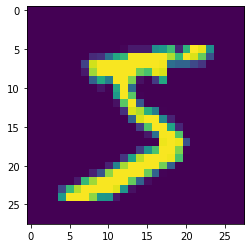

In [ ]:
# Dataset check (img)
plt.imshow(X_train[0])

In [ ]:
# Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(256, activation='relu'), # relu는 0보다 작으면 0을, 0보다 크면 x값을 출력하는 활성화함수
                    Dense(units=10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fitting
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5984 - accuracy: 0.8900
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3331 - accuracy: 0.9288
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2598 - accuracy: 0.9394
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2459 - accuracy: 0.9437
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2324 - accuracy: 0.9488


<function matplotlib.pyplot.legend(*args, **kwargs)>

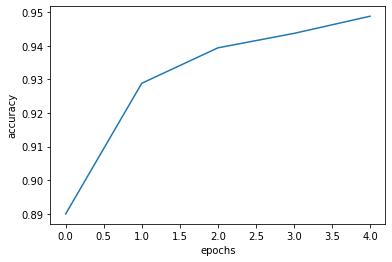

In [ ]:
# 학습 정확도 (epoch에 따른 정확도 변화)
plt.plot(history.history['accuracy'], label='acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

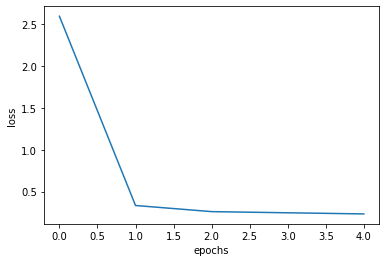

In [ ]:
# epoch에 따른 손실 변화
plt.plot(history.history['loss'], label='acc')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend

**Fashion_mnist data**

In [ ]:
# Lib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Dataset
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalization (scaling pixel values to the range [0, 1])
X_train, X_test = X_train / 255.0, X_test / 255.0

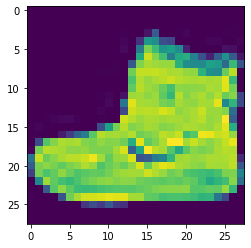

In [ ]:
# Dataset check (img)
plt.imshow(X_train[0])

In [ ]:
y_train[0]

9

In [ ]:
# Label check
classes = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

print(classes[y_train[0]])

Ankle boot


T-shirt/top


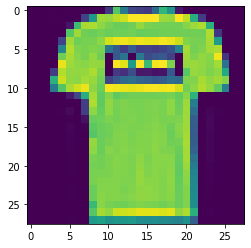

In [ ]:
# Dataset check (img, label)
print(classes[y_train[1]])
plt.imshow(X_train[1])

In [ ]:
# Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
                    Flatten(input_shape=(28, 28)),
                    Dense(256, activation='relu'),
                    Dropout(0.2),
                    Dense(units=10, activation='softmax')
])

In [ ]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fitting
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5056 - accuracy: 0.8192 - val_loss: 0.4203 - val_accuracy: 0.8467
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3879 - accuracy: 0.8588 - val_loss: 0.3801 - val_accuracy: 0.8630
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3547 - accuracy: 0.8709 - val_loss: 0.3754 - val_accuracy: 0.8669
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3338 - accuracy: 0.8768 - val_loss: 0.3607 - val_accuracy: 0.8670
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3158 - accuracy: 0.8827 - val_loss: 0.3517 - val_accuracy: 0.8698
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3069 - accuracy: 0.8854 - val_loss: 0.3471 - val_accuracy: 0.8727
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2916 - accuracy: 0.8909 - val_loss: 0.3623 - val_accuracy:

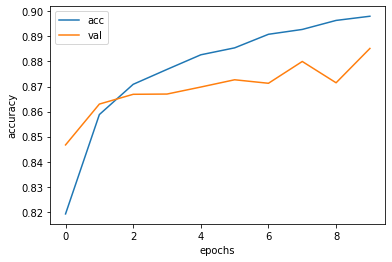

In [ ]:
# 학습 정확도 (epoch에 따른 정확도 변화)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

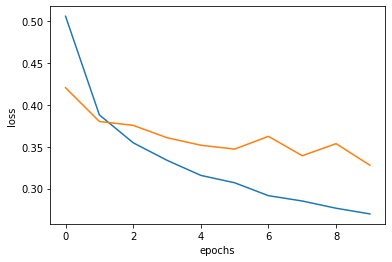

In [ ]:
# epoch에 따른 손실 변화
plt.plot(history.history['loss'], label='acc')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend

In [ ]:
# Predict
pred = model.predict(X_test)
pred[1]

array([2.2554897e-05, 7.1532534e-15, 9.9823147e-01, 2.9202277e-10, 8.4802380e-04, 2.1743575e-15, 8.9791574e-04,
       8.0169569e-21, 1.5206791e-11, 2.4800914e-21], dtype=float32)

In [ ]:
# 가장 높은 값 찾기 - np.argmax()는 데이터에서 가장 높은 인덱스 값을 반환
np.argmax(pred[1])

2

In [ ]:
# 예측한 레이블은?
classes[np.argmax(pred[1])]

'Pullover'

In [ ]:
# 실제 레이블
classes[y_test[1]]

'Pullover'

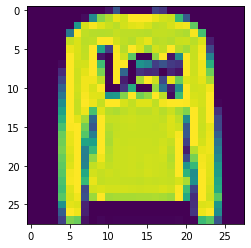

In [ ]:
# Dataset check (img)
plt.imshow(X_test[1])

**합성곱 신경망(CNN, Convolutional Neural Network)을 활용하여 이미지 분류(성능 올리기)**  
>합성곱 신경망(CNN)은 시각적 영상을 분류하는데 사용되는 다층의 피드, 포워드적인 인공싱경망의 한 종류  
합성곱층(Convolution layer)과 풀링층(Pulling layer)으로 구성



In [ ]:
# Lib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
# Dataset
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# shape 변경
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [ ]:
# Normalization (scaling pixel values to the range [0, 1])
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
# Model
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                    MaxPooling2D((2, 2)),
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D((2, 2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
])

In [ ]:
# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
# Fitting
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.4707 - accuracy: 0.8281 - val_loss: 0.3861 - val_accuracy: 0.8606
Epoch 2/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.3168 - accuracy: 0.8836 - val_loss: 0.3148 - val_accuracy: 0.8833
Epoch 3/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2712 - accuracy: 0.8993 - val_loss: 0.2889 - val_accuracy: 0.8930
Epoch 4/10
1875/1875 [==============================] - 132s 71ms/step - loss: 0.2426 - accuracy: 0.9107 - val_loss: 0.2671 - val_accuracy: 0.9020
Epoch 5/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2182 - accuracy: 0.9197 - val_loss: 0.2600 - val_accuracy: 0.9074
Epoch 6/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.1952 - accuracy: 0.9272 - val_loss: 0.2469 - val_accuracy: 0.9104
Epoch 7/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.1789 - accuracy: 0.9339 - val_loss: 0.26

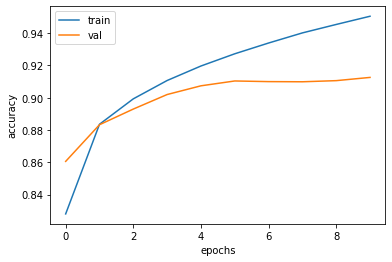

In [ ]:
# 학습 정확도 (epoch에 따른 정확도 변화)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

<function matplotlib.pyplot.legend(*args, **kwargs)>

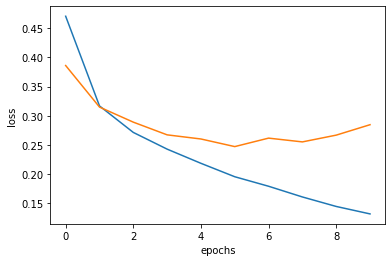

In [ ]:
# epoch에 따른 손실 변화
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend